## Algoritmo Perceptrón

Consideremos las funciones AND y OR. Estas funciones son linealmente separables y por lo tanto pueden ser aprendidas por un único perceptrón.
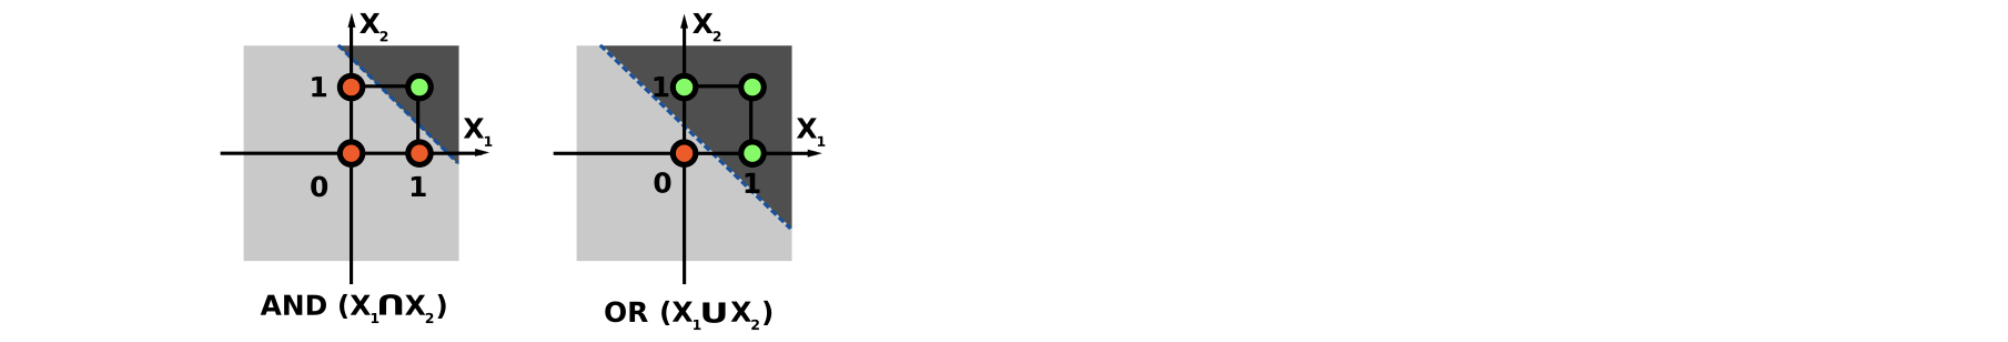

In [ ]:
# Hiperparámetros
umbral = 0.5
tasa_de_aprendizaje = 0.1

# Datos
conjunto_de_datos = [((0, 0), 0),
                     # ((0, 1), 0),
                     ((1, 0), 0),
                     ((1, 1), 1)] # Tabla de Verdad AND

# Modelo: Algoritmo Perceptron
def perceptron(valores, pesos):
    return int(activacion(suma_pesada(valores, pesos)))

def suma_pesada(valores, pesos):
    if len(valores) != len(pesos):
        raise ValueError("Las listas 'valores' y 'pesos' deben tener la misma longitud")
    return sum(valores[i] * pesos[i] for i in range(len(valores)))

def activacion(_suma_pesada):
    return _suma_pesada >= umbral

# Entrenamiento
epoca = 1
pesos = [0, 0]
while True:
   print(f'--------------------------- {epoca} ---------------------------'); epoca += 1
   contador_de_errores = 0
   for X_de_entrada, y_deseada in conjunto_de_datos:
       y_resultado = perceptron(X_de_entrada, pesos)
       error = y_deseada - y_resultado                        # Perdida
       if error != 0:
           contador_de_errores += 1
           for indice, valor in enumerate(X_de_entrada):
               pesos[indice] += tasa_de_aprendizaje * error * valor  # retropropagación
       print(f"Pesos (p): {pesos} -> Entrada (X): {X_de_entrada}, Salida (y): {y_resultado}, Error: {error}")
   if contador_de_errores == 0:
       break

--------------------------- 1 ---------------------------
Pesos (p): [0, 0] -> Entrada (X): (0, 0), Salida (y): 0, Error: 0
Pesos (p): [0, 0] -> Entrada (X): (1, 0), Salida (y): 0, Error: 0
Pesos (p): [0.1, 0.1] -> Entrada (X): (1, 1), Salida (y): 0, Error: 1
--------------------------- 2 ---------------------------
Pesos (p): [0.1, 0.1] -> Entrada (X): (0, 0), Salida (y): 0, Error: 0
Pesos (p): [0.1, 0.1] -> Entrada (X): (1, 0), Salida (y): 0, Error: 0
Pesos (p): [0.2, 0.2] -> Entrada (X): (1, 1), Salida (y): 0, Error: 1
--------------------------- 3 ---------------------------
Pesos (p): [0.2, 0.2] -> Entrada (X): (0, 0), Salida (y): 0, Error: 0
Pesos (p): [0.2, 0.2] -> Entrada (X): (1, 0), Salida (y): 0, Error: 0
Pesos (p): [0.30000000000000004, 0.30000000000000004] -> Entrada (X): (1, 1), Salida (y): 0, Error: 1
--------------------------- 4 ---------------------------
Pesos (p): [0.30000000000000004, 0.30000000000000004] -> Entrada (X): (0, 0), Salida (y): 0, Error: 0
Pesos (p): [

### Predicción

In [ ]:
# Predicción
X_prueba = (0, 1)
y_prueba = perceptron(X_prueba, pesos)
print(f"Entrada (X): {X_prueba}, Salida (y): {y_prueba}")

Entrada (X): (0, 1), Salida (y): 0


## Percetron Orientado a Objetos

Implementación del algoritmo perceptron en el paradigma orientado a objetos

### La Clase Perceptron

In [ ]:
import numpy as np

# Definir el Perceptrón
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iter=10):
        self.learning_rate = learning_rate  # Tasa de aprendizaje
        self.n_iter = n_iter                # Número de iteraciones
        self.weights = None                 # Pesos iniciales
        self.bias = None                    # Sesgo inicial
        self.epoca = 0                      # Contador de épocas

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Inicializar pesos a ceros
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Entrenamiento
        for _ in range(self.n_iter):
            self.epoca += 1
            errores = 0
            # Iterar sobre cada muestra de entrenamiento
            for idx, x_i in enumerate(X):
                # Calcular salida lineal
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Función de activación
                y_predicted = self._activation_function(linear_output)

                # Actualizar pesos y sesgo
                update = self.learning_rate * (y[idx] - y_predicted)  # Perdida
                self.weights += update * x_i                 # retropropagación
                self.bias += update
                errores += int(update != 0.0)

            if errores == 0:
                break

    def predict(self, X):
        # Predicción con la función de activación
        linear_output = np.dot(X, self.weights) + self.bias
        return self._activation_function(linear_output)

    def _activation_function(self, x):
        # Función de activación: devuelve 1 si el resultado >= 0, de lo contrario 0
        return np.where(x >= 0, 1, 0)

### Proceso General de Aprendizaje Profundo

In [ ]:
# Datos para la operación AND
# X son las entradas (dos valores binarios)
# y son las salidas esperadas para la operación AND
X = np.array([[0, 0, 0], [0, 1, 0], [0, 1, 1],
              [1, 0, 0], [1, 1, 0], [1, 1, 1]])  # Entradas
y = np.array([0, 0, 0,
              0, 0, 1])  # Salidas esperadas

# Modelo perceptrón
perceptron = Perceptron(learning_rate=0.1, n_iter=10)

# Entrenamiento
perceptron.fit(X, y)

# Probar el perceptrón con las mismas entradas de la operación AND
y_pred = perceptron.predict(X)

print(f"X:\n{X}")
print(f"Epocas: {perceptron.epoca}")
print(f"Pesos finales: {perceptron.weights}")
print(f"Sesgo final: {perceptron.bias}")
print(f"Predicciones para AND: {y_pred}")

X:
[[0 0 0]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 1 0]
 [1 1 1]]
Epocas: 3
Pesos finales: [0.1 0.  0.1]
Sesgo final: -0.2
Predicciones para AND: [0 0 0 0 0 1]


### Prueba de Esfuerzo

In [ ]:
X_test = np.array([[0, 0, 0],[0, 0, 1],[1, 0, 1],[1, 1, 1],])
perceptron.predict(X_test)

array([0, 0, 1, 1])

## Perceptrón Multicapa (MLP)

La función XOR no puede ser aprendida por un único perceptrón puesto que requiere al menos de dos líneas para separar las clases (0 y 1). Debe utilizarse al menos una capa adicional de perceptrones para permitir su aprendizaje.

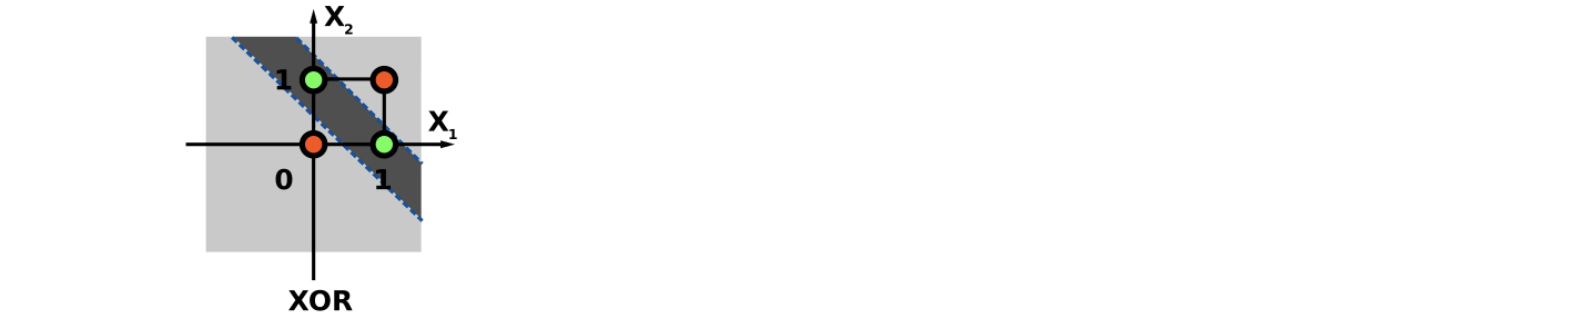

### scikit-learn

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier

# Datos para la operación XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Entradas
y = np.array([0, 1, 1, 0])  # Salidas esperadas

# Crear un perceptrón multicapa con 2 neuronas en la capa oculta
mlp = MLPClassifier(hidden_layer_sizes=(20,))

# Entrenar el MLP con los datos XOR
mlp.fit(X, y,)

# Hacer predicciones
y_pred = mlp.predict(X)

print(f"X:\n{X}")
print(f"Predicciones para XOR: {y_pred}")

#print(f"\nPesos de la red neuronal: {mlp.coefs_}")

# Calcular la precisión del modelo
accuracy = np.mean(y_pred == y)
print(f"\nPrecisión del modelo: {accuracy * 100:.2f}%")

X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Predicciones para XOR: [0 1 1 0]

Precisión del modelo: 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Keras

In [ ]:
import numpy as np
import keras

# Datos para la operación XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Entradas
y = np.array([0, 1, 1, 0])  # Salidas esperadas (XOR)

# Crear el modelo secuencial
model = keras.Sequential()

# Añadir capa oculta con 2 neuronas y activación 'relu'
model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dense(5, activation='relu'))

# Añadir capa de salida con 1 neurona y activación 'sigmoid'
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1),
                  loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X, y, epochs=500, verbose=1)

# Hacer predicciones
print("Predicciones:")
y_pred = model.predict(X)

# Imprimir predicciones
print(f"X:\n{X}")
print(f"Predicciones para XOR: \n{np.round(y_pred)}")

# Calcular la precisión del modelo
print(f"\nPrecisión del modelo: {model.evaluate(X, y)[1] * 100:.2f}%")

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6967
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.5000 - loss: 0.6851
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7500 - loss: 0.6712
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.6367
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7500 - loss: 0.6085
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7500 - loss: 0.5874
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7500 - loss: 0.5579
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7500 - loss: 0.5154
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7500 - loss: 0.4699
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.4171
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.3612
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - los